In [84]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

In [82]:
path = "./data/"
train = f'{path}train'
test = f'{path}test'
valid = f'{path}valid'

In [14]:
folders = !ls {train}

In [101]:
def get_file_count(parent, folder):
    fc = !ls {parent}/'{folder}' | wc -l
    return int(fc[0])

train_disbn = { folder: get_file_count(train, folder) for folder in folders  }
valid_disbn = { folder: get_file_count(valid, folder) for folder in folders  }

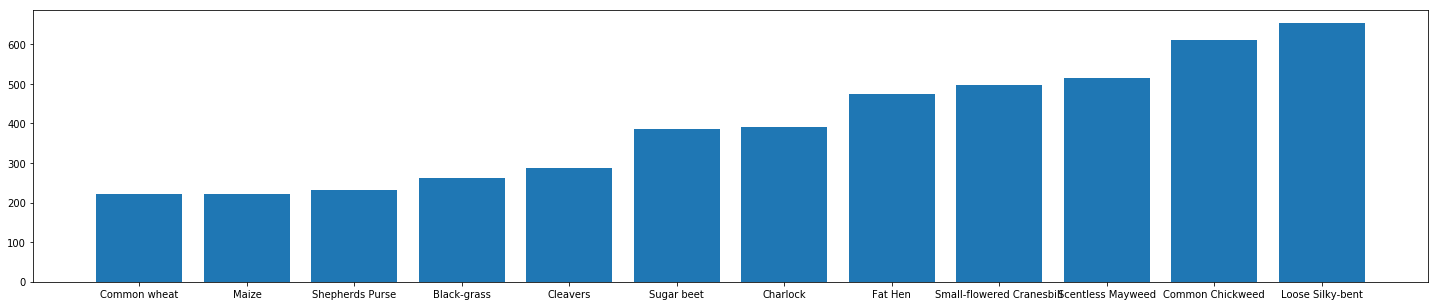

In [45]:
sorted_classes = sorted(class_disbn, key=class_disbn.get)
sorted_vals = list(map(class_disbn.get, sorted_classes))
plt.figure(figsize=(25,5))
plt.bar(range(len(sorted_classes)), sorted_vals, align='center')
plt.xticks(range(len(sorted_classes)), sorted_classes)
plt.show()

In [66]:
imgsize_map = {}
for folder in folders: 
    files = !ls {train}/'{folder}'
    for file in files:
        img = mpimg.imread(os.path.join(train, folder, file))
        imgsize_map[file] = img.shape

(array([1.576e+03, 8.450e+02, 4.990e+02, 6.300e+02, 4.060e+02, 2.820e+02,
        1.470e+02, 9.700e+01, 8.800e+01, 4.800e+01, 4.700e+01, 2.700e+01,
        2.000e+01, 9.000e+00, 7.000e+00, 3.000e+00, 5.000e+00, 5.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00]),
 array([  49. ,  162.6,  276.2,  389.8,  503.4,  617. ,  730.6,  844.2,
         957.8, 1071.4, 1185. , 1298.6, 1412.2, 1525.8, 1639.4, 1753. ,
        1866.6, 1980.2, 2093.8, 2207.4, 2321. , 2434.6, 2548.2, 2661.8,
        2775.4, 2889. , 3002.6, 3116.2, 3229.8, 3343.4, 3457. ]),
 <a list of 30 Patch objects>)

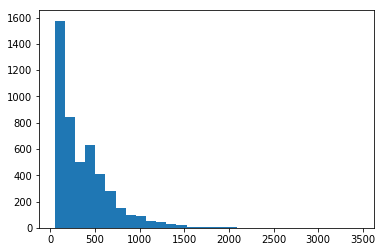

In [77]:
plt.hist(list(map(lambda x: x[0], imgsize_map.values())), bins=30)

(array([1.874e+03, 6.770e+02, 6.770e+02, 5.850e+02, 3.810e+02, 1.830e+02,
        1.140e+02, 9.100e+01, 6.200e+01, 3.600e+01, 3.000e+01, 1.100e+01,
        6.000e+00, 3.000e+00, 6.000e+00, 3.000e+00, 3.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([  49. ,  180.4,  311.8,  443.2,  574.6,  706. ,  837.4,  968.8,
        1100.2, 1231.6, 1363. , 1494.4, 1625.8, 1757.2, 1888.6, 2020. ,
        2151.4, 2282.8, 2414.2, 2545.6, 2677. , 2808.4, 2939.8, 3071.2,
        3202.6, 3334. , 3465.4, 3596.8, 3728.2, 3859.6, 3991. ]),
 <a list of 30 Patch objects>)

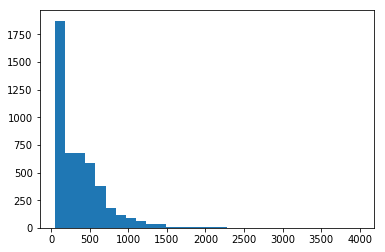

In [78]:
plt.hist(list(map(lambda x: x[1], imgsize_map.values())), bins=30)

## Creating validation dataset

In [110]:
def create_valid(val_split=0.15):
    !mkdir -p {valid}
    folders = !ls {train}
    for folder in folders:
        !mkdir -p {valid}/'{folder}'
        !mv {valid}/'{folder}'/* {train}/'{folder}'
        files = !ls {train}/'{folder}'
        np.random.shuffle(files)
        for file in files[0:int(val_split*len(files))]:
            !mv {train}/'{folder}'/{file} {valid}/'{folder}'/{file}

In [111]:
create_valid()

mv: cannot stat './data/valid/Black-grass/*': No such file or directory
mv: cannot stat './data/valid/Charlock/*': No such file or directory
mv: cannot stat './data/valid/Cleavers/*': No such file or directory
mv: cannot stat './data/valid/Common Chickweed/*': No such file or directory
mv: cannot stat './data/valid/Common wheat/*': No such file or directory
mv: cannot stat './data/valid/Fat Hen/*': No such file or directory
mv: cannot stat './data/valid/Loose Silky-bent/*': No such file or directory
mv: cannot stat './data/valid/Maize/*': No such file or directory
mv: cannot stat './data/valid/Scentless Mayweed/*': No such file or directory
mv: cannot stat './data/valid/Shepherds Purse/*': No such file or directory
mv: cannot stat './data/valid/Small-flowered Cranesbill/*': No such file or directory
mv: cannot stat './data/valid/Sugar beet/*': No such file or directory


In [106]:
!ls ./data/valid/Black-grass

## Looking through sample submission

In [112]:
sub = pd.read_csv(f'{path}sample_submission.csv')

In [114]:
sub.head()

,file,species
0,0021e90e4.png,Sugar beet
1,003d61042.png,Sugar beet
2,007b3da8b.png,Sugar beet
3,0086a6340.png,Sugar beet
4,00c47e980.png,Sugar beet
